<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

In [1]:
#HIDDEN
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact, interactive

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/consolidation_analytical_plot.ipynb

# Konsolidationstheorie - Beispiele

## Konstante plötzlich aufgebrachte Flächenlast mit unendlicher Ausdehnung

Die plötzlich aufgebrachte Flächenlast $q_0$ äußert sich wie folgt:

\begin{align*}
    \Delta \sigma(z,t) = q_0 \qquad \Delta u(z,t=0) = p_0 \qquad \Delta \sigma'(z,t=0) = q_0 - p_0
\end{align*}

Den Anfangsporendruck finden wir aus der Annahme, dass bei $t=0$ noch kein Porenwasser entweichen konnte, d.h. dass eine Deformation nur durch die Kompression des Porenfluids zustande kommen kann:

$$
    \epsilon_\text{v} = \beta_\text{F} n p_0
$$

Gleichzeitig gilt aufgrund der einachsigen Deformation

$$
    \epsilon_\text{v} = \epsilon_{zz} = \frac{\Delta \sigma_{zz} - \Delta u}{E_\text{s}} = \frac{q_0 - p_0}{E_\text{s}}
$$

Damit ergibt sich der Anfangsüberdruck (Rechteckverteilung) zu 

$$
    \Delta u(z,t=0) = p_0 = \frac{q_0}{1 + E_\text{s} n \beta_\text{F}}
$$

**Für ein inkompressibles Fluid ergibt sich $p_0 = q_0$.**

Seien der untere Rand ($z=0$) undurchlässig und der obere Rand ($z=H$) durchlässig:

\begin{align*}
    \Delta u(z=H) = 0 \qquad \left. \frac{\partial \Delta u}{\partial z} \right|_{z=0,t} = 0
\end{align*}

Dann gilt die analytische Lösung:

\begin{align*}
    \Delta u(z,t) &= \frac{4p_0}{\pi} \sum \limits_{i=0}^{\infty} \left\{ \frac{(-1)^i}{2i+1} \cos\left[ (2i+1) \frac{\pi}{2}\frac{z}{H} \right] \exp \left[ -(2i+1)^2 \frac{\pi^2}{4} \frac{c_\text{v}t}{H^2} \right] \right\}
\end{align*}

bzw. in dimensionloser Form

\begin{align*}
    \Delta \bar{u}(\zeta, T_\text{V}) &= \frac{4}{\pi} \sum \limits_{i=0}^{\infty} \left\{ \frac{(-1)^i}{2i+1} \cos\left[ (2i+1) \frac{\pi}{2}\zeta \right] \exp \left[ -(2i+1)^2 \frac{\pi^2}{4} T_\text{V} \right] \right\}
\end{align*}

mit

\begin{equation*}
    \Delta \bar{u} = \frac{\Delta u}{p_0} \qquad \zeta = \frac{z}{H} \qquad T_\text{V} = \frac{c_\text{v}t}{H^2}
\end{equation*}

Bei gegebenem Strömungsdruck $\Delta u$ können wir nun auch die Effektivspannungsänderung berechnen:

$$
    \Delta \sigma'(z,t) = \Delta \sigma - \Delta u(z,t)
$$

Die Lösung der dimensionlosen Form sieht wie folgt aus:

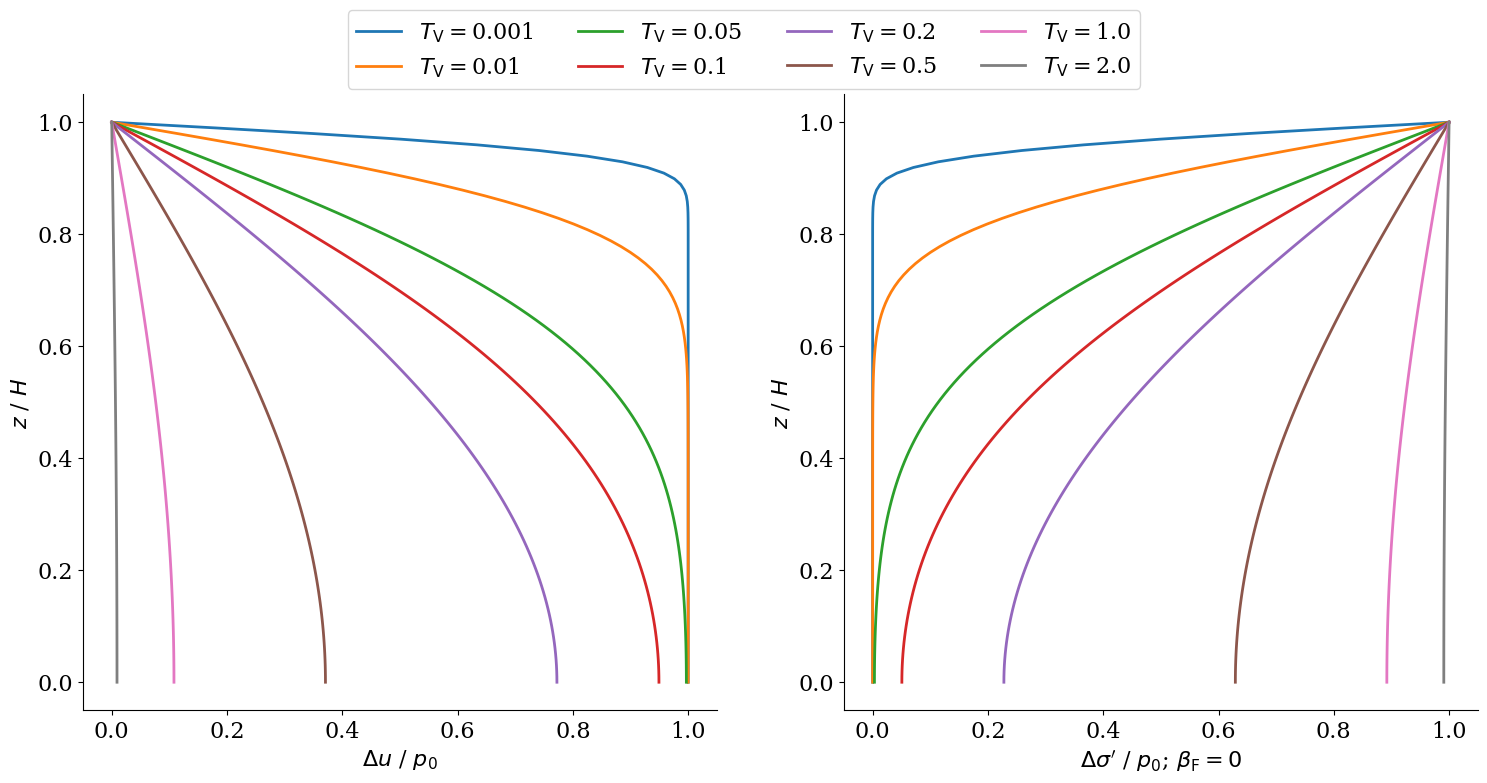

In [2]:
#HIDDEN
plot_solution()

In einer Tiefe $z$ ergibt sich ein lokaler Konsolidationsgrad

$$
    U_z = 1 - \frac{\Delta u}{p_0},
$$
dessen graphische Darstellung also komplementär zur obigen Abbildung wäre.

Aus der Effektivspannungsverteilung lässt sich durch Integration die Setzung belasteten Oberfläche ermitteln:

$$
    s(t) = \int \limits_0^H \epsilon_{zz}(z,t)\,\text{d}z = \int \limits_0^H \frac{\Delta \sigma'_{zz}(z,t)}{E_\text{s}}\,\text{d}z
$$

Bei konstantem Steifemodul und unter Verwendung der dimensionslosen Größen können wir schreiben:

$$
    s(T_\text{V}) = \frac{H}{E_\text{s}} \int \limits_0^1 \Delta \sigma'_{zz}(\zeta,T_\text{V})\,\text{d}\zeta = \frac{Hq_0}{E_\text{s}} - \frac{H}{E_\text{s}} \int \limits_0^1 \Delta u (\zeta,T_\text{V})\,\text{d}\zeta = s_\infty - \frac{H}{E_\text{s}} \int \limits_0^1 \Delta u (\zeta,T_\text{V})\,\text{d}\zeta 
$$

Mit der Endsetzung $s_\infty = \lim \limits_{T_\text{V}\rightarrow \infty} s(T_\text{V})$ und der Sofortsetzung $s_0$ definiert sich der (mittlere) Verfestigungsgrad der Schicht zu

$$
    U = \frac{s - s_0}{s_\infty - s_0} \qquad \text{so dass} \quad U(T_\text{V} = 0) = 0 \text{ und } \quad U(T_\text{V} \gg 1 ) \approx 1
$$

Im vorliegenden Fall (rechteckförmige Nullisochrone) sind Sofort- und Endsetzung wie folgt gegeben:

\begin{align*}
    s_0 &= \frac{H}{E_\text{s}} (q_0 - p_0) = \frac{Hq_0}{E_\text{s}} \left( 1 - \frac{1}{1 + E_\text{s} n \beta_\text{F}} \right)
    \\
    s_\infty &= \frac{Hq_0}{E_\text{s}}
\end{align*}

Damit ergibt sich alternativ zu der Formulierung in Oberflächensetzungen eine Formulierung in Abhängigkeit der Porenwasserüberdrücke (Rechteckverteilung):

\begin{align*}
    U = \frac{p_0 - \int \limits_0^1 \Delta u (\zeta,T_\text{V})\,\text{d}\zeta}{p_0}
\end{align*}

Bei einer *beliebigen Anfangsdruckverteilung* muss auch diese integriert werden und es ergibt sich der Verfestigungsgrad zu

\begin{align*}
    U &= \frac{\int \limits_0^1 [\Delta u_0 (\zeta) - \Delta u (\zeta,T_\text{V})]\,\text{d}\zeta}{\int \limits_0^1 \Delta u_0 (\zeta)\,\text{d}\zeta}  \qquad \text{so dass ebenfalls gilt} \quad U(T_\text{V} = 0) = 0 \text{ und } \quad U(T_\text{V} \gg 1 ) \approx 1
\end{align*}

Hier, für eine Rechteckverteilung $\Delta u_0 (\zeta) = p_0$ ergibt sich der oben hergeleitete Sonderfall 

\begin{align*}
    U &= 1 - \int \limits_0^1 \frac{\Delta u (\zeta,T_\text{V})}{p_0}\,\text{d}\zeta = 1 - \int \limits_0^1 \Delta \bar{u} (\zeta,T_\text{V})\,\text{d}\zeta
\end{align*}

Mit der gegebenen analytischen Lösung für $\Delta \bar{u}$ findet man durch Integration

\begin{align*}
    U(T_\text{V}) &= 1 - \frac{8}{\pi^2} \sum \limits_{i=0}^{\infty} \left\{ \frac{1}{(2i+1)^2} \exp \left[ -(2i+1)^2 \frac{\pi^2}{4} T_\text{V} \right] \right\}
\end{align*}

Dieser lässt sich graphisch sehr schön veranschaulichen:

In [3]:
#HIDDEN
plot_interactive_verdichtungsgrad()

interactive(children=(FloatSlider(value=0.3, description='$T_\\mathrm{V}$', max=2.0), Output()), _dom_classes=…

Sei der erste (und größte) Summand ($i=0$) in 

\begin{align*}
    U(T_\text{V}) &= 1 - \frac{8}{\pi^2} \sum \limits_{i=0}^{\infty} \left\{ \frac{1}{(2i+1)^2} \exp \left[ -(2i+1)^2 \frac{\pi^2}{4} T_\text{V} \right] \right\}
\end{align*}

etwa 0.01, dann ist wegen $U > 0.99$ die Konsolidation zu mind 99% abgeklungen.

\begin{align*}
    0.01 &= \frac{8}{\pi^2} \exp \left[ - \frac{\pi^2}{4} T_\text{V} \right] \qquad \rightarrow \qquad T_\text{V} = 1.78... \approx 2
\end{align*}

Damit ergibt sich die Zeit, nach der eine Konsolidation zu 99% abgeschossen ist, zu 

\begin{align*}
    t_{0.99} = 2 \frac{H^2}{c_\text{v}} = 2 \frac{H^2\gamma_\text{w}(1 + E_\text{s} \beta_\text{F} n)}{E_\text{s} k_\text{f}}
\end{align*}

Je steifer der Boden und je höher seine Durchlässigkeit, umso schneller konsolidiert er. Das Vorhandensein kompressibler Fluide verlangsamt den Prozess.

Die folgenden Näherungslösungen können angewendet werden, um das Auswerten der Summenformeln zu umgehen:

\begin{align*}
    U \approx
    \begin{cases}
        \frac{2}{\sqrt{\pi}} \sqrt{T_\text{V}}  & U \leq 0.5
        \\
        1 - \frac{8}{\pi^2} \exp \left( -\frac{\pi^2}{4} T_\text{V} \right)& U > 0.5
    \end{cases}
\end{align*}

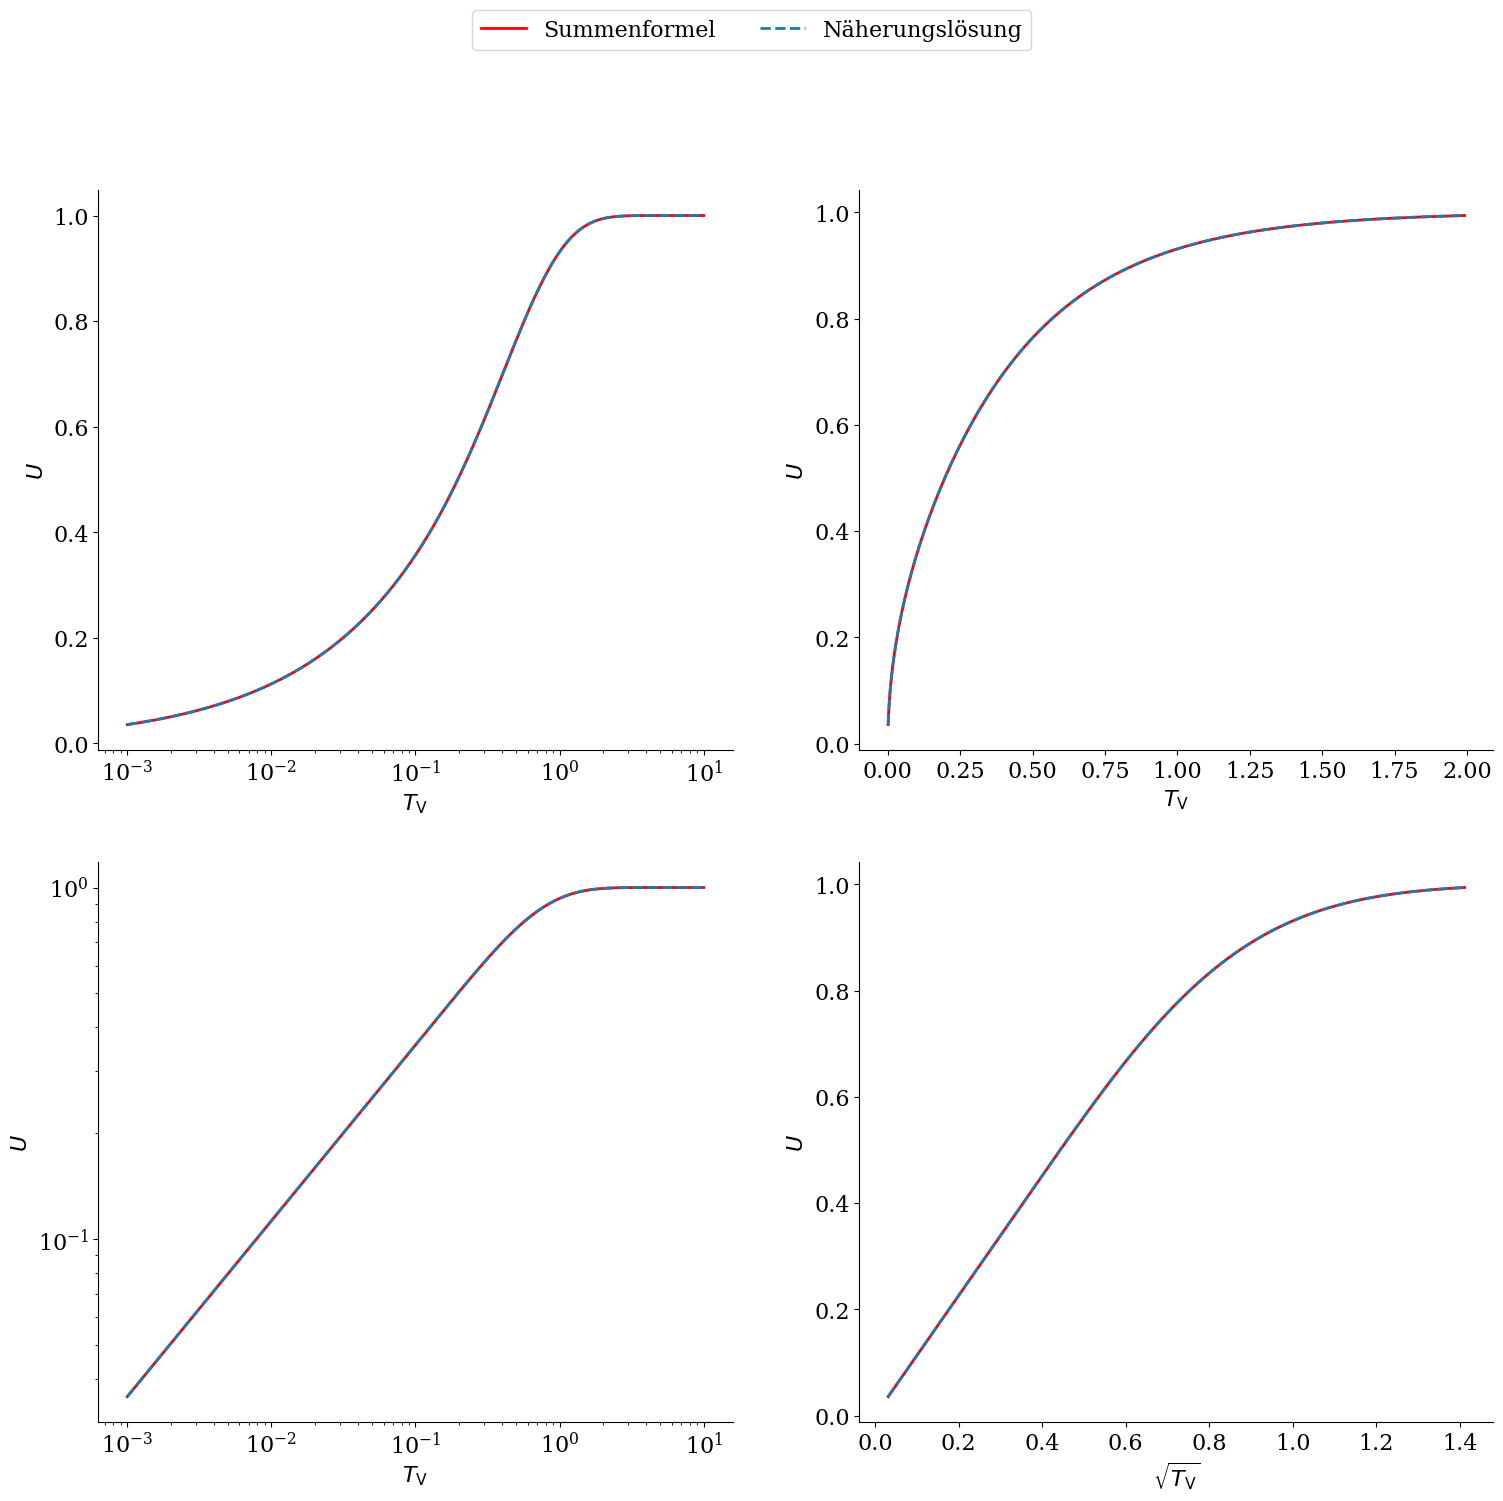

In [4]:
#HIDDEN
#%run plot_functions/consolidation_analytical_plot.ipynb
plot_verdichtungsgrad_approx_mod()

Die Lösung der Druck- und Effektivspannungsverteilung kann auch auf eine beidseitig entwässerte Schicht der Dicke 2H angewendet werden, wobei die Randbedingungen als

$$
    \Delta u (z=-H,t) = \Delta u(z=H,t) = 0
$$

gesetzt werden und sich in der Symmetrieebene 

$$
    \left. \frac{\partial \Delta u}{\partial z} \right|_{z=0,t} = 0
$$

automatisch ergibt. Als Anfangsbedingung behalten wir die Rechteckverteilung bei. Zur Illustration seien die entsprechenden Verläufe hier dargestellt.

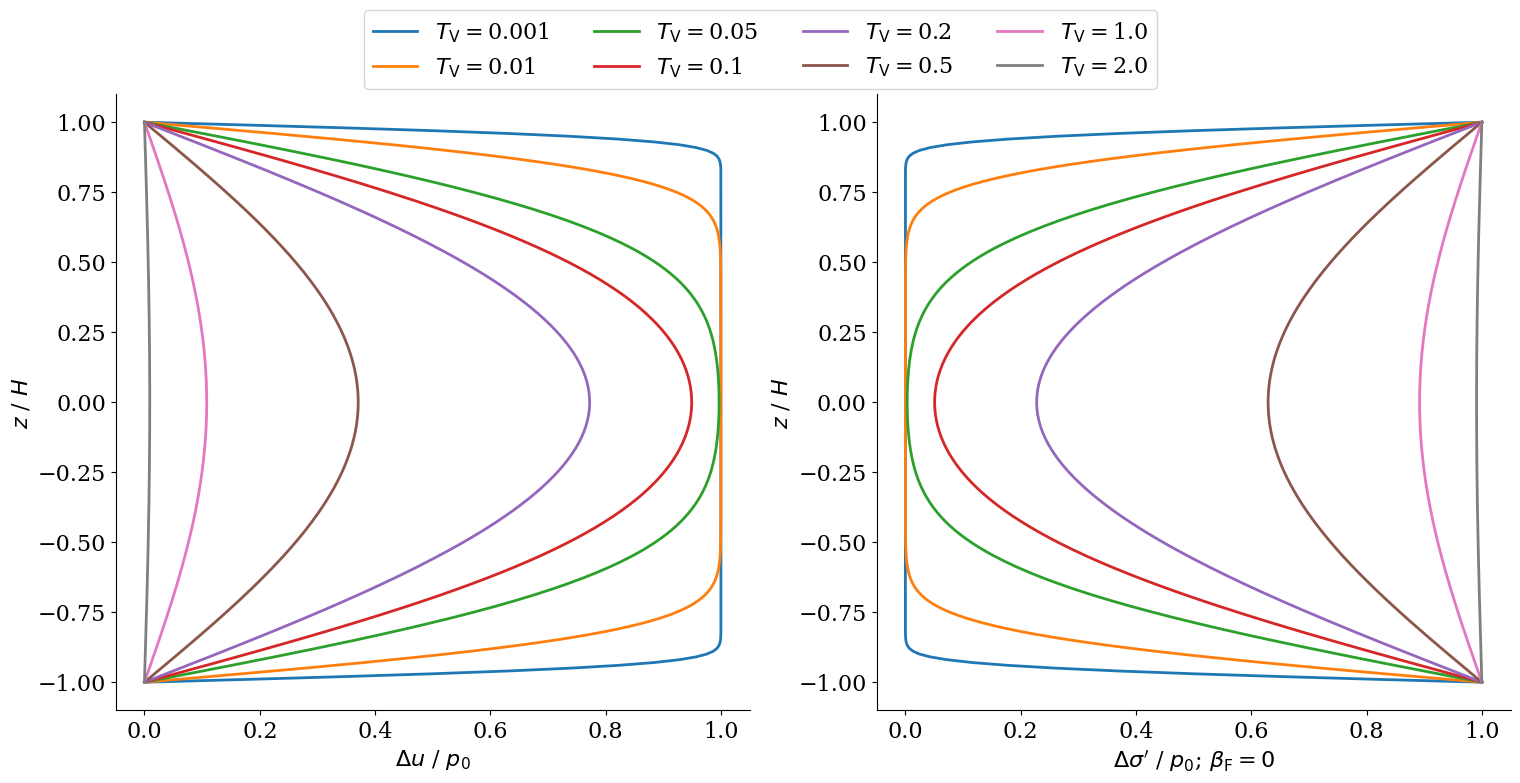

In [5]:
#HIDDEN
plot_zweiseitig()

## Weitere Approximationen

In den Setzungsberechnungen (Lehrveranstaltung Bodenmechanik Vertiefung) werden folgende Approximationen in DIN 4019 angegeben. Dabei ist zu beachten, dass die Sofort- und Konsolidationssetzungen nach der Norm vereinfachend zusammengefasst und als eindimensionaler Konsolidationsvorgang betrachtet werden ($s_0$ kann jedoch gesondert abgeschätzt werden).

\begin{align*}
    U = \frac{s}{s_\infty} \approx
    \begin{cases}
        \frac{2}{\sqrt{\pi}} \sqrt{T_\text{V}}  & T_\text{V} \leq 0.2
        \\
        1 - \frac{1}{2} \exp \left( \frac{1}{2} -\frac{8}{\pi} T_\text{V} \right)& 0.2 < T_\text{V} \leq 1
    \end{cases}
\end{align*}

Die Grenzziehung bei $T_\text{V} = 0.2$ entspricht in guter Näherung der obigen Fallunterscheidung bei $U = 0.5$. Auch die Approximation ist der oben aus der analytischen Lösung heraus motivierten Approximation sehr ähnlich, wie die folgende Abbildung zeigt.

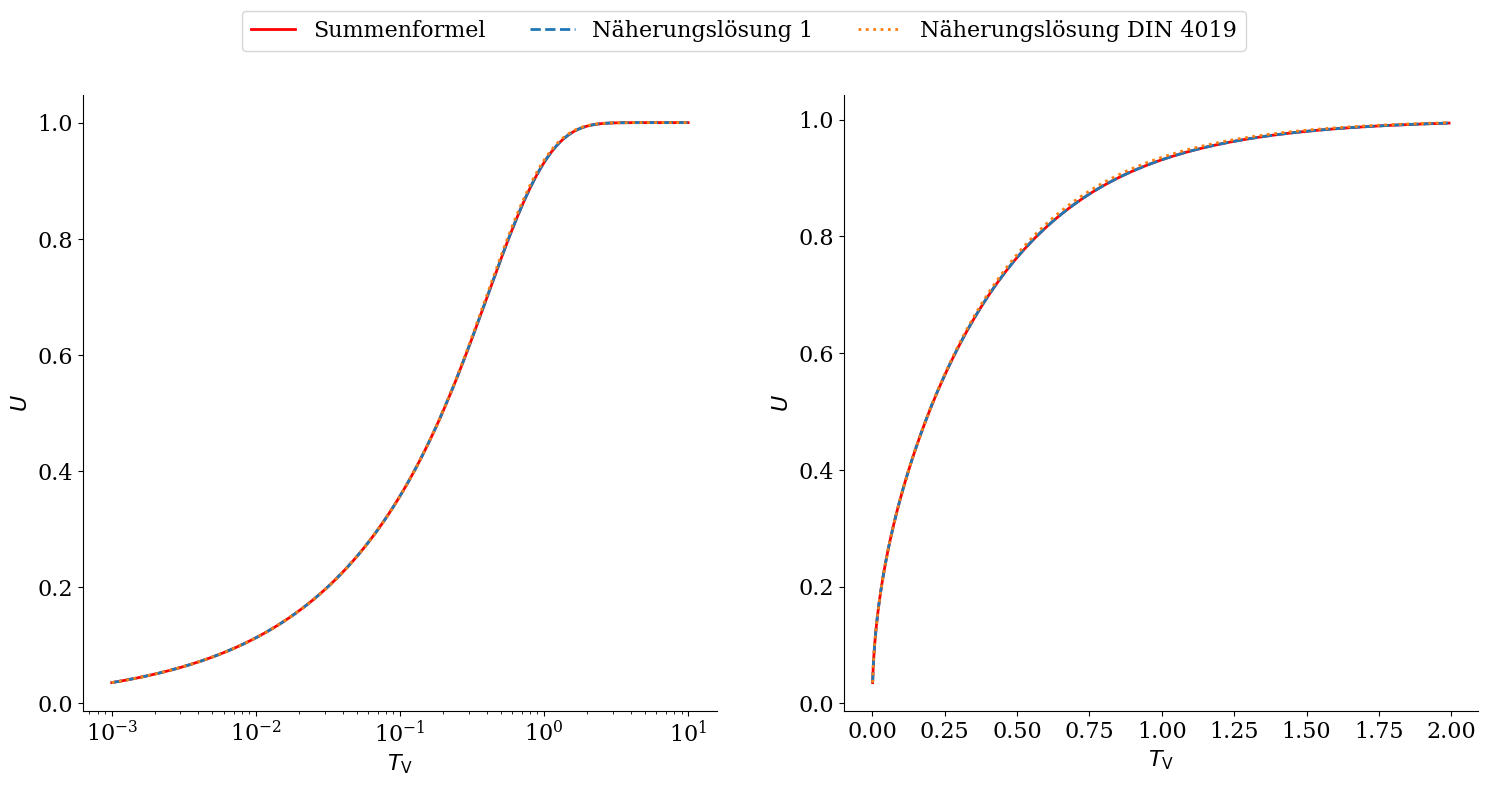

In [6]:
#HIDDEN
plot_verdichtungsgrad_approx2()